# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
 96% 5.00M/5.21M [00:01<00:00, 5.18MB/s]
100% 5.21M/5.21M [00:01<00:00, 3.39MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_O

## Import Libraries

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
#loading
train_dir = os.path.join("/content/ParkingLot_Occupation/train")
test_dir = os.path.join("/content/ParkingLot_Occupation/test")

train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    seed=12332
)
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    seed=12332
)

Found 1382 files belonging to 2 classes.
Found 344 files belonging to 2 classes.


In [4]:
#normalaizing
train_data = train_data.map(lambda x, y: (x / 255.0, y))
test_data = test_data.map(lambda x, y: (x / 255.0, y))

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [5]:
val_split = 0.15
train_size = int(len(train_data) * (1 - val_split))

train_dataset = train_data.take(train_size)
val_dataset = train_data.skip(train_size)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

In [7]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# Adding neural Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [9]:
hist = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
37/37 [==============================] - 10s 102ms/step - loss: 0.4912 - accuracy: 0.7821 - val_loss: 0.1965 - val_accuracy: 0.9444
Epoch 2/20
37/37 [==============================] - 3s 76ms/step - loss: 0.1933 - accuracy: 0.9257 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 3/20
37/37 [==============================] - 3s 73ms/step - loss: 0.1004 - accuracy: 0.9620 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 4/20
37/37 [==============================] - 3s 82ms/step - loss: 0.1164 - accuracy: 0.9569 - val_loss: 0.0919 - val_accuracy: 0.9697
Epoch 5/20
37/37 [==============================] - 4s 89ms/step - loss: 0.1334 - accuracy: 0.9561 - val_loss: 0.1327 - val_accuracy: 0.9596
Epoch 6/20
37/37 [==============================] - 3s 68ms/step - loss: 0.2055 - accuracy: 0.9485 - val_loss: 0.0798 - val_accuracy: 0.9646
Epoch 7/20
37/37 [==============================] - 3s 68ms/step - loss: 0.0845 - accuracy: 0.9721 - val_loss: 0.1257 - val_accuracy: 0.9545
Epoch 8/20


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [10]:
model.evaluate(test_data)

11/11 [==============================] - 1s 57ms/step - loss: 0.0435 - accuracy: 0.9826


[0.04350291192531586, 0.9825581312179565]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

1/1 [==============================] - 0s 19ms/step


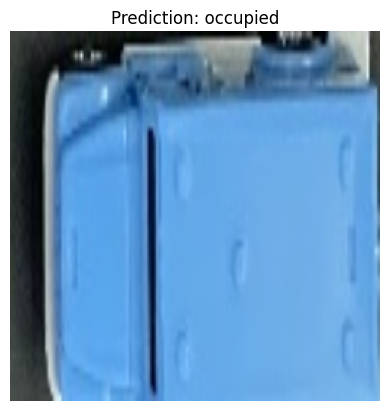

In [20]:
for images, labels in test_data.take(1):
    image = images[0]

    image_path = "test_image.jpg"
    tf.keras.utils.save_img(image_path, image)

    image_array = tf.expand_dims(image, 0)


    prediction = model.predict(image_array)
    predicted_label = "occupied" if prediction > 0.5 else "empty"


    plt.imshow(image)
    plt.title("Prediction: {}".format(predicted_label))
    plt.axis('off')
    plt.show()


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

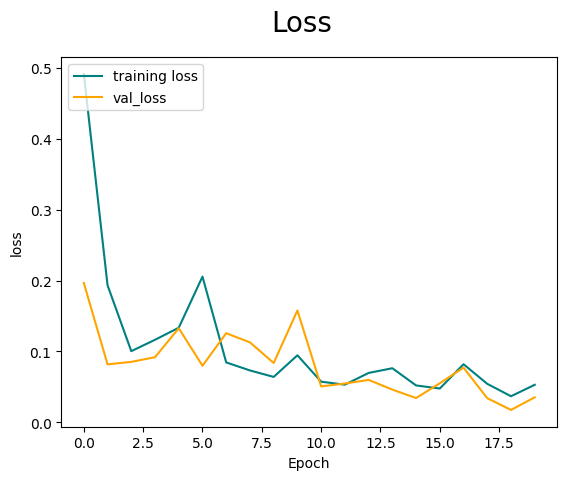

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

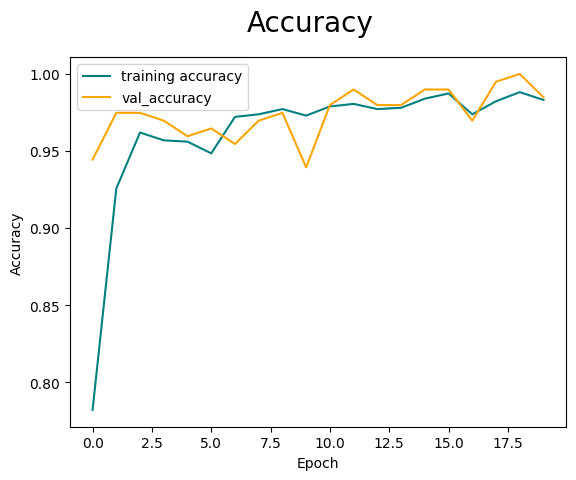

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [23]:
model.save('parking_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:


1. **Data Preprocessing:** Resizing images makes sure they’re all the same size, and normalizing helps the model learn better by keeping the data consistent.
2. **Model Architecture:** The model has three layers that help pick out important details from the images without being too complicated.
3. **Activation Functions:** ReLU is used for non-linear feature extraction in hidden layers, and sigmoid is used in the output layer for binary classification, providing a probability score.
5. **Loss Function and Metrics:** Binary cross-entropy matches our two-class problem, and accuracy is a clear way to see how well the model is doing.
6. **Regularization Techniques:** No need because there was no overfitting
7. **Model Evaluation:** I checked how well the model worked on new data using accuracy, which shows how good the model is at generalizing.
8. **Model Visualization:** The accuracy and loss curves showed steady learning, with no major problems like overfitting or underfitting.
9. **Overfitting and Underfitting:** The model didn’t overfit .



